In [1]:
!python -m pip install --upgrade pip
!pip install PyHamcrest
!pip install weather-api --upgrade
!pip install yweather
!pip install folium

Requirement already up-to-date: pip in c:\programdata\anaconda3\lib\site-packages (18.1)
Requirement already up-to-date: weather-api in c:\programdata\anaconda3\lib\site-packages (1.0.6)


In [2]:
import yweather
from weather import Weather, Unit

In [3]:
client = yweather.Client()
client.fetch_woeid('ascoli piceno')

'710388'

In [4]:
from bs4 import BeautifulSoup
import requests

html_doc = 'http://www.comuni-italiani.it/province.html'
result = requests.get(html_doc)

soup = BeautifulSoup(result.text, 'html.parser')

table = soup.findAll('table')[1]
links = table.findAll('a')
province=[]
for i in links:
    province.append(i.text[0:25].replace('-',' ').replace("'","").strip().lower())
    
    
list_province = []
for i in province:
    print(i, client.fetch_woeid(i))
    list_province.append(client.fetch_woeid(i))
print("done!")

agrigento 709859
alessandria 709961
ancona 710129
aosta 710203
arezzo 710284
ascoli piceno 710388
asti 710404
avellino 710448
bari 56786913
barletta andria trani 7153342
belluno 710848
benevento 710882
bergamo 710893
biella 710984
bologna 711080
bolzano 711089
brescia 711410
brindisi 711438
cagliari 711665
caltanissetta 711749
campobasso 711892
carbonia iglesias 28301713
caserta 713081
catania 713571
catanzaro 713572
chieti 714007
como 714505
cosenza 714748
cremona 714820
crotone 714885
cuneo 714917
enna 715168
fermo 715393
ferrara 715399
firenze 715496
foggia 715550
forlì cesena 7153334
frosinone 715845
genova 716085
gorizia 716283
grosseto 716428
imperia 716647
isernia 716689
la spezia 716908
laquila 716751
latina 717055
lecce 717162
lecco 717167
livorno 717348
lodi 2441037
lucca 717458
macerata 717572
mantova 717803
massa carrara 12591868
matera 718113
messina 718268
milano 718345
modena 718431
monza e della brianza 719063
napoli 719258
novara 719400
nuoro 719433
olbia tempio 283017

In [5]:
client.fetch_woeid("Modena")

'718431'

In [6]:
weather = Weather(unit=Unit.CELSIUS)

lookup = weather.lookup(560743)
condition = lookup.condition

print(condition.text)

Cloudy


In [7]:
eather = Weather(unit=Unit.CELSIUS)
location = weather.lookup_by_location('rome')
condition = location.condition
print(condition.text)

Mostly Sunny


In [8]:
weather = Weather(unit=Unit.CELSIUS)

forecasts = location.forecast
for forecast in forecasts:
    print(forecast.text)
    print(forecast.date)
    print(forecast.high)
    print(forecast.low)

Sunny
25 Dec 2018
14
3
Sunny
26 Dec 2018
11
0
Sunny
27 Dec 2018
13
0
Partly Cloudy
28 Dec 2018
12
1
Mostly Cloudy
29 Dec 2018
12
2
Partly Cloudy
30 Dec 2018
11
0
Partly Cloudy
31 Dec 2018
11
2
Mostly Sunny
01 Jan 2019
11
2
Partly Cloudy
02 Jan 2019
10
0
Partly Cloudy
03 Jan 2019
11
2


In [9]:
weather = Weather(Unit.CELSIUS)
lookup = weather.lookup_by_latlng(42.504154, 12.646361)
condition = lookup.condition
print(condition.text)

Sunny


In [10]:
!weather rome --u c

Weather report for Rome, Italy
Condition: Mostly Sunny 
Temperature: 14


In [11]:
import folium
from weather import Weather, Unit
import pandas as pd
import matplotlib.pyplot as plt



In [12]:
places = [2459115,2442047,2436704]
weather = Weather(unit=Unit.CELSIUS)
locat ={}
xa=[]

def calcola(location):
    locat['temperature']=location.condition.temp
    locat['humidity']=location.atmosphere.humidity
    locat['pressure']=location.atmosphere.pressure
    locat['visibility']=location.atmosphere.visibility
    locat['latitude']=location.latitude
    locat['longitude']=location.longitude
    locat['city']=location.location.city
    locat['wind_speed']=location.wind.speed
    return locat

for i in range(0,len(list_province)):
    location = weather.lookup(list_province[i])
#    print(list_province[i])
    xa.insert(i, calcola(location).copy())
    
x=pd.DataFrame.from_dict(xa)


In [13]:
x.tail(10)

,city,humidity,latitude,longitude,pressure,temperature,visibility,wind_speed
100,Trieste,55,45.641602,13.7892,34100.95,8,25.91,14.48
101,Udine,78,46.06068,13.2332,34439.59,6,25.91,8.05
102,Varese,36,45.8214,8.82357,33220.49,9,25.91,6.44
103,Venice,100,45.437012,12.33711,34879.82,3,7.24,9.66
104,Verbano-Cusio-Ossola,14,46.1157,8.29921,29901.82,8,25.91,6.44
105,Vercelli,57,45.32246,8.41675,34304.13,10,25.91,8.05
106,Verona,82,45.430279,10.98811,34304.13,5,25.91,4.83
107,Vibo Valentia,47,38.676601,16.1017,33762.31,12,25.91,12.87
108,Vicenza,87,45.546799,11.5416,34575.04,3,25.91,4.83
109,Viterbo,33,42.42548,12.10568,33220.49,11,25.91,22.53


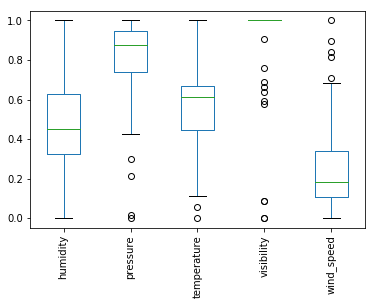

In [14]:
#print(location.location.city)
#dir(location.wind)

xclean = x.drop(columns=['city','latitude','longitude'])

from sklearn.preprocessing import MinMaxScaler    
scaler=MinMaxScaler()
xscaled=pd.DataFrame(scaler.fit_transform(xclean),columns=xclean.columns)
xscaled.plot.box()
plt.xticks(rotation=90)
plt.show()

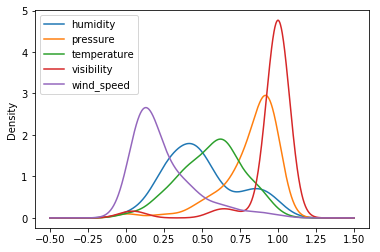

In [15]:
xscaled.plot.density()
plt.show()

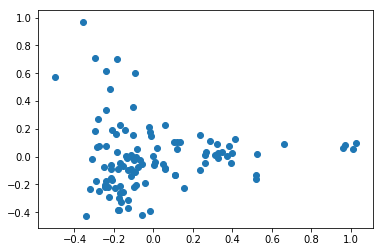

In [16]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
PC=pca.fit_transform(xscaled)
pdf=pd.DataFrame(data=PC,columns=['A','B'])
plt.scatter(pdf['A'],pdf['B'])

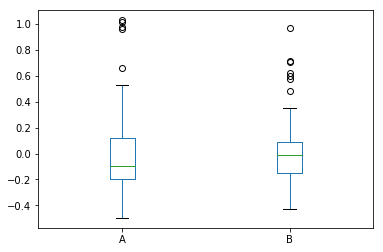

In [17]:
# PCA for outlier detection
## We overcame the problem of outliers using PCA
pdf.plot.box()
plt.show()

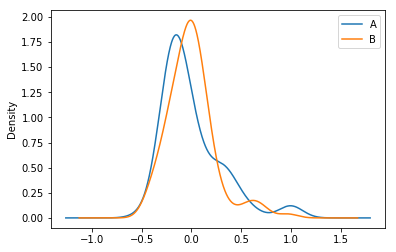

In [18]:
pdf.plot.density()
plt.show()

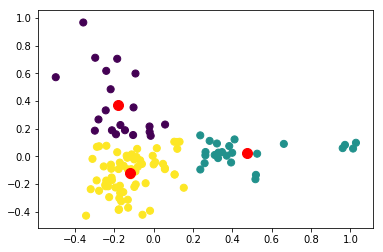

In [19]:
#Kmeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3).fit(pdf)
y_kmeans=km.predict(pdf)
plt.scatter(pdf['A'], pdf['B'], c=y_kmeans, s=50)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=1);
plt.show()

In [20]:
labels=pd.DataFrame.from_dict(y_kmeans,dtype='float')
x=x.join(labels)
x=x.rename(columns={0:'labels'})
x=pd.DataFrame.from_dict(x)
locations = x[['latitude', 'longitude']]
locationlist = locations.values.tolist()

In [21]:
def regioncolors(counter):
    if counter['labels'] == 1:
        return 'darkblue'
    elif counter['labels'] == 0:
        return 'purple'
    elif counter['labels'] == 2:
        return 'green'
    else:
        return 'darkblue'

In [22]:
x["color"] = x.apply(regioncolors, axis=1)
x.head()

,city,humidity,latitude,longitude,pressure,temperature,visibility,wind_speed,labels,color
0,Agrigento,86,37.31073,13.58346,33863.90,13,25.91,16.09,2.0,green
1,Alessandria,45,44.90807,8.61071,34337.99,11,25.91,1.61,2.0,green
2,Ancona,68,43.611698,13.5088,34710.50,10,25.91,11.27,2.0,green
3,Aosta,40,45.737,7.3178,28547.27,6,25.91,6.44,0.0,purple
4,Arezzo,53,43.462521,11.86708,33186.62,10,25.91,11.27,2.0,green


In [27]:
map3 = folium.Map(location=[42.504154,12.646361], tiles='CartoDB positron', zoom_start=6)
labels = x["city"].values.tolist()
locationlist = x[["latitude","longitude"]].astype(float).values.tolist()

for point in range(0, len(x)):
    folium.Marker(locationlist[point],popup=labels[point], icon=folium.Icon(color=x.loc[point,"color"], icon_color='white', icon='circle', angle=0, prefix='fa')).add_to(map3)


display(map3)

In [24]:
labels
    

['Agrigento',
 'Alessandria',
 'Ancona',
 'Aosta',
 'Arezzo',
 'Ascoli Piceno',
 'Asti',
 'Avellino',
 'Bari',
 'Puglia',
 'Belluno',
 'Benevento',
 'Bergamo',
 'Biella',
 'Bologna',
 'Bolzano',
 'Brescia',
 'Brindisi',
 'Cagliari',
 'Caltanissetta',
 'Campobasso',
 'Carbonia-Iglesias',
 'Caserta',
 'Catania',
 'Catanzaro',
 'Chieti',
 'Como',
 'Cosenza',
 'Cremona',
 'Crotone',
 'Cuneo',
 'Enna',
 'Fermo',
 'Ferrara',
 'Florence',
 'Foggia',
 'Emilia Romagna',
 'Frosinone',
 'Genoa',
 'Gorizia',
 'Grosseto',
 'Imperia',
 'Isernia',
 'La Spezia',
 "L'Aquila",
 'Latina',
 'Lecce',
 'Lecco',
 'Leghorn',
 'Lodi',
 'Lucca',
 'Macerata',
 'Mantua',
 'Massa-Carrara',
 'Matera',
 'Messina',
 'Milan',
 'Modena',
 'Monza',
 'Naples',
 'Novara',
 'Nuoro',
 'Olbia-Tempio',
 'Oristano',
 'Padua',
 'Palermo',
 'Parma',
 'Pavia',
 'Perugia',
 'Marche',
 'Sambuceto',
 'Piacenza',
 'Pisa',
 'Pistoia',
 'Pordenone',
 'Potenza',
 'Prato',
 'Province of Ragusa',
 'Ravenna',
 'Reggio Calabria',
 'Reggio E